**Data Audit & Exploratory Data Analysis**

**Project:** PRISM – Predictive & Research-based Insurance Statistical Modeling

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
freq_raw = pd.read_csv(
    "/content/drive/MyDrive/freMTPL2freq.csv"
)

In [5]:
freq_raw.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [6]:
freq = freq_raw.rename(columns={
    "IDpol": "policy_id",
    "ClaimNb": "claim_count",
    "Exposure": "exposure",
    "Area": "area",
    "VehPower": "vehicle_power",
    "VehAge": "vehicle_age",
    "DrivAge": "driver_age",
    "BonusMalus": "bonus_malus",
    "VehBrand": "vehicle_brand",
    "VehGas": "vehicle_gas"
})

In [7]:
freq.shape


(678013, 12)

In [8]:
freq.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   policy_id      678013 non-null  float64
 1   claim_count    678013 non-null  int64  
 2   exposure       678013 non-null  float64
 3   area           678013 non-null  object 
 4   vehicle_power  678013 non-null  int64  
 5   vehicle_age    678013 non-null  int64  
 6   driver_age     678013 non-null  int64  
 7   bonus_malus    678013 non-null  int64  
 8   vehicle_brand  678013 non-null  object 
 9   vehicle_gas    678013 non-null  object 
 10  Density        678013 non-null  int64  
 11  Region         678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB


In [9]:
freq.isnull().mean().sort_values(ascending=False)


,0
policy_id,0.0
claim_count,0.0
exposure,0.0
area,0.0
vehicle_power,0.0
vehicle_age,0.0
driver_age,0.0
bonus_malus,0.0
vehicle_brand,0.0
vehicle_gas,0.0


In [10]:
freq.duplicated().sum()


np.int64(0)

In [11]:
freq["claim_count"].value_counts().sort_index()


,count
claim_count,
0,643953
1,32178
2,1784
3,82
4,7
5,2
6,1
8,1
9,1


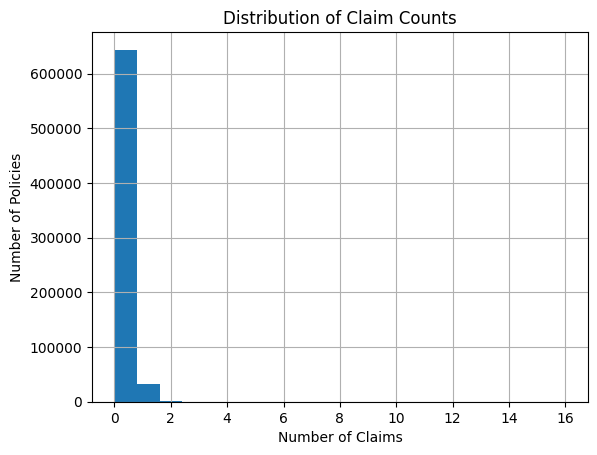

In [12]:
freq["claim_count"].hist(bins=20)
plt.xlabel("Number of Claims")
plt.ylabel("Number of Policies")
plt.title("Distribution of Claim Counts")
plt.show()


In [13]:
freq["claim_count"].mean(), freq["claim_count"].var()


(np.float64(0.05324676665491664), 0.05765633238094156)

In [14]:
freq["exposure"].describe()


,exposure
count,678013.000000
mean,0.528750
std,0.364442
min,0.002732
25%,0.180000
50%,0.490000
75%,0.990000
max,2.010000


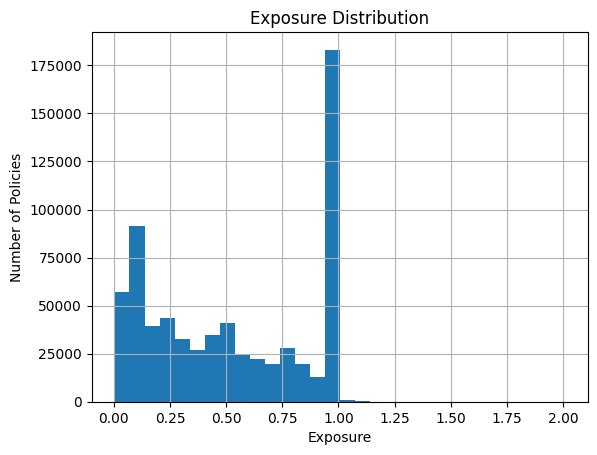

In [15]:
freq["exposure"].hist(bins=30)
plt.xlabel("Exposure")
plt.ylabel("Number of Policies")
plt.title("Exposure Distribution")
plt.show()


### Key Observations

- Claim counts are heavily concentrated at zero, with a small proportion of policies reporting one or more claims.
- The empirical mean and variance of claim counts are compared to assess overdispersion, informing the choice between Poisson and Negative Binomial models.
- Exposure varies across policies and will be incorporated as an offset term in the frequency model to normalize claim counts.


## Model Family Decision

| Component | Distribution | Link Function | Rationale |
|---------|-------------|--------------|-----------|
| Claim Frequency | Poisson / Negative Binomial | Log | Count data with exposure |
